# Admission Percentage Predictor

This is a linear Regression model which will predict Chances of you getting admission for Upper Graduation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

## Load the dataset from the Data folder which contains the data of the 500 students who applied for the Higher Studies

In [2]:
data = pd.read_csv("Data/data.csv")

In [3]:
col = data.columns

## About the Dataset

`Serial No.` :- This is a unique number assigned to the applicant  
`GRE Score` :- The Scores of **Graduate Record Examinations** out of 340  
`TOEFL Score` :- The Scores of **Test Of English as a Foreign Language** out of 120  
`University Rating` :- Rating of the university for which the applicant has applied  
`SOP` :- **Statenment Of Purpose** Strength out of 5  
`LOR` :- **Letter Of Recommendation** Strength out of 5  
`CGPA` :- **Cumulative Grade Point Average** Strength out of 10  
`Research` :- Describes Wheather the student has done any research as 0 or 1(0 Stands for no research)  
`Chance of Admit` :- Determines the Chances of Admission as Probablity  

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


### Plot the Column vs Chances of Admission plot for all the Columns in our Dataset

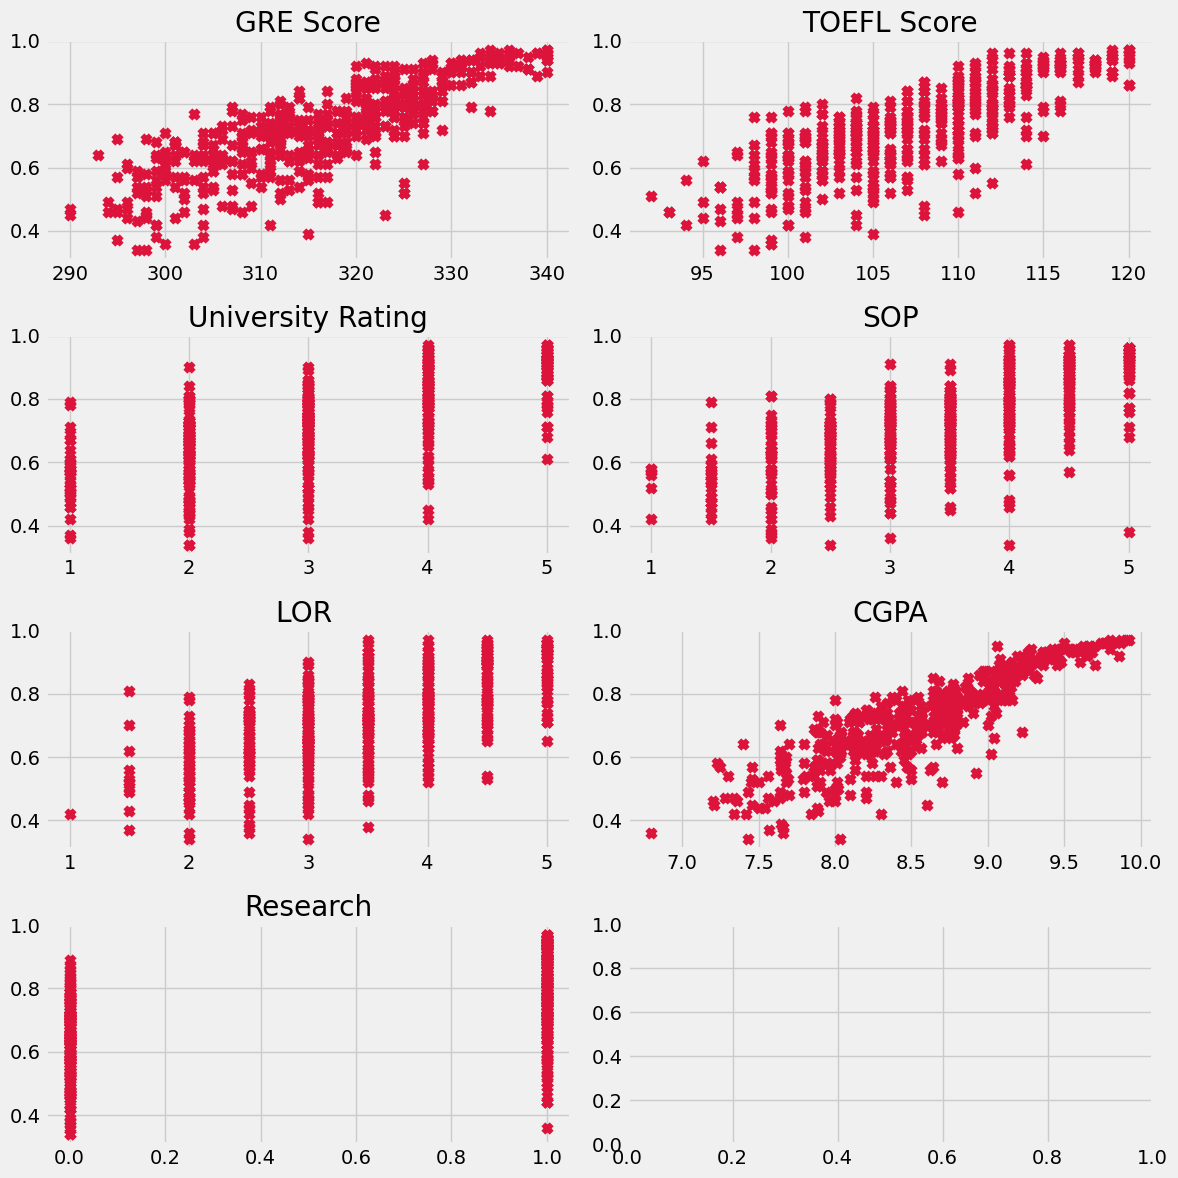

In [50]:
fig, axs = plt.subplots(4, 2, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    if i != 7:
        ax.scatter(data[col[i  + 1]], data[col[8]], color="crimson", marker="x")
        ax.set_title(col[i + 1])
# fig.subplots_adjust(h_space=2)
plt.tight_layout()

### From the plots above we can say that gre and tofl scor and cgpa are the most important factors

## Let's Createa a Linear Regression Model Without using Regularization

### First write a function load Data which will load the data into the X_train and y_train

In [5]:
from numpy import genfromtxt

In [6]:
def load_data():
    my_data = genfromtxt("Data/data.csv", delimiter=",")
    X_train = my_data[1:, 1:8]
    y_train = my_data[1:, 8]

    return X_train, y_train

In [21]:
X_train, y_train = load_data()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [11]:
print(X_train.shape)
print(y_train.shape)

(400, 7)
(400,)


### Function to Determine the cost the function

The cost function for linear Regression is 
$$J(w, b) = \frac{1}{2m} \sum\limits_{i=0}^{n-1}(f_{w, b}(x^{(i)}) - y^{(i)})^{2}$$

where $f_{w, b}(x^{(i)}) = w^{(i)}x^{(i)} + b$

In [12]:
def compute_cost(X, y, w, b):
    m, n = X.shape
    
    f_wb = X @ w + b
    err = f_wb - y
    
    cost = np.sum((err ** 2)) / 2 * m

    return cost

## Function to Determine the Gradient for the given values of parameters

In [13]:
def compute_gradient(X, y, w, b):
    m, n = X.shape

    f_wb = X @ w + b
    err = f_wb - y

    dj_dw = (X.T @ err) / m
    dj_db = np.sum(err) / m

    return dj_dw, dj_db

## Function for the Gradient Descent

In [14]:
def compute_gradient_descent(X, y, w_in, b_in, alpha=1e-3, iterations=10000):
    m, n = X.shape

    for i in range(iterations):
        cost = compute_cost(X, y, w_in, b_in)

        dj_dw, dj_db = compute_gradient(X, y, w_in, b_in)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i % (iterations // 10) == 0:
            print(f"iter: {i}, cost: {cost}")

    return w_in, b_in

## Let's try out our gradient descent function with initial values of parameters set to zero

In [24]:
X_train.shape

(500, 7)

In [15]:
w = np.zeros(7)
b = 0
iter = 300000
alpha = 1e-5

w, b = compute_gradient_descent(X_train, y_train, w, b, alpha, iter)

iter: 0, cost: 42925.84
iter: 30000, cost: 656.156681011899
iter: 60000, cost: 559.6428226180732
iter: 90000, cost: 518.0535096565866
iter: 120000, cost: 497.534169045622
iter: 150000, cost: 485.3671431314103
iter: 180000, cost: 476.7181603343275
iter: 210000, cost: 469.72779255543486
iter: 240000, cost: 463.6618655614157
iter: 270000, cost: 458.21411389536024


## Let's Get the r_squared value for the model

In [16]:
pred_y = X_test @ w + b
e1= np.sum((y_test - pred_y) ** 2)
e2 = np.sum((y_test - np.mean(y_test)) ** 2)
r_squred = 1 - (e1 / e2)
r_squred

0.7013645508720461

## Lets predict some values

In [17]:
pred_y = X_train @ w + b

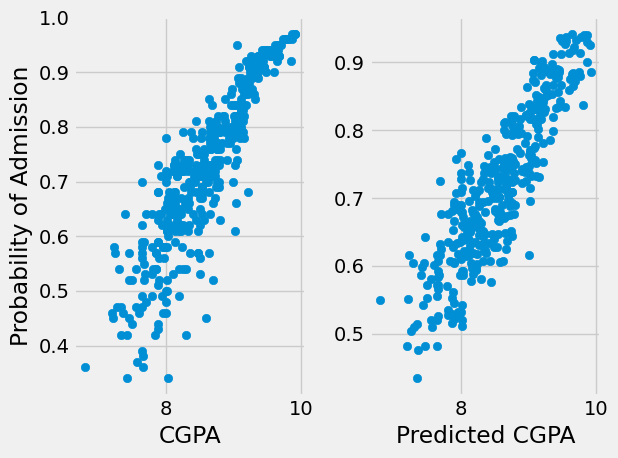

In [18]:
fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_train[:, 5], y_train)
ax[1].scatter(X_train[:, 5], pred_y)

ax[0].set_xlabel("CGPA")
ax[0].set_ylabel("Probability of Admission")
ax[1].set_xlabel("Predicted CGPA")
plt.tight_layout()

## Let's see if Regularization and Polynomial function will have any difference on cost

Write all the function for Regularized linear Regression

The regularized cost is  
$$J(w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1}(f_{w, b}(x^{(i)}) - y^{(i)})^{2} + \frac{1}{2m} \sum\limits_{j=0}^{n-1} w_j^2$$

And Gradient functions are 
$$ \frac{\partial}{\partial w}J(w, b) = \frac{1}{m}\sum\limits_{i=0}^{m}(f_{w, b}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}w_j$$ 
$$ \frac{\partial}{\partial b}J(w, b) = \frac{1}{m}\sum\limits_{i=0}^{m}(f_{w, b}(x^{(i)}) - y^{(i)})$$   
- **_Note_** The b term don't reuire regularization

In [22]:
w_try = np.zeros(7)
f_wb = np.zeros(500)
for i in range(7):
    f_wb += ((X_train[:, i]**(i + 1)) * w_try[i])
f_wb += 0
f_wb.shape

(500,)

In [23]:
def compute_cost_reg(X, y, w, b, lambda_):
    m, n = X.shape
    f_wb = X**5 @ w + X**4 @ w + X**3 @ w + X**2 @ w + X @ w + b
    err = f_wb - y

    cost = (np.sum(err**2)) / 2 * m

    reg_cost = cost + (np.sum(w**2) * (lambda_ / 2 * m))

    return reg_cost

In [24]:
def compute_gradient_reg(X, y, w, b, lambda_):
    m, n = X.shape    
    f_wb = X**5 @ w + X**4 @ w + X**3 @ w + X**2 @ w + X @ w + b #X**5 @ w + X**4 @ w + X**3 @ w + 
    err = f_wb - y
    
    dj_dw = (X.T @ err) / m
    dj_db = np.sum(err) / m

    dj_dw_reg = dj_dw + (w *(lambda_ / m))

    return dj_dw_reg, dj_db

In [25]:
def compute_gradient_descent_reg(X, y, w_in, b_in, alpha=1e-3, iterations=10000, lambda_=0.01):
    m, n = X.shape

    for i in range(iterations):
        cost = compute_cost_reg(X, y, w_in, b_in, lambda_)

        dj_dw, dj_db = compute_gradient_reg(X, y, w_in, b_in, lambda_)

        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        if i % (iterations // 10) == 0:
            print(f"iter: {i}, cost: {cost}")

    return w_in, b_in

In [32]:
w = np.zeros(7)
b = 0
iter = 10000
alpha = 1e-15
lambda_ = 5

w, b = compute_gradient_descent_reg(X_train, y_train, w, b, alpha, iter, lambda_)

iter: 0, cost: 67598.675
iter: 1000, cost: 870.2708981252129
iter: 2000, cost: 869.2250336344972
iter: 3000, cost: 868.1981030521864
iter: 4000, cost: 867.1897713192296
iter: 5000, cost: 866.1997092416823
iter: 6000, cost: 865.2275933885862
iter: 7000, cost: 864.2731059916218
iter: 8000, cost: 863.335934846503
iter: 9000, cost: 862.4157732160875


In [34]:
pred_y = X_train @ w + b
e1= np.sum((y_train - pred_y) ** 2)
e2 = np.sum((y_train - np.mean(y_train)) ** 2)
r_squred = 1 - (e1 / e2)
r_squred

-26.201629236449484

The Difference is not more but it can help in reducing the overfitting

## Now, let's Build this model with the help of Neural Network

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [36]:
model = Sequential(
    [
        Dense(units=10, activation='linear', name="L1"),
        Dense(units=5, activation='linear', name="L2"),
        Dense(units=3, activation='linear', name="L3"),
        Dense(units=1, activation='linear', name="L4")
    ]
)

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(0.1)
)
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 21258.1602
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 774.8090
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 115.1212
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 15.5567
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 2.6534
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6662
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.1408
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0509
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0364
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 11/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 12/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0302
Epoch 13/100
16/16 [========

In [37]:
pred_y = model.predict(X_train)

16/16 [==============================] - 0s 2ms/step


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 10)                80        
                                                                 
 L2 (Dense)                  (None, 5)                 55        
                                                                 
 L3 (Dense)                  (None, 3)                 18        
                                                                 
 L4 (Dense)                  (None, 1)                 4         
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
w, b = model.get_layer("L4").get_weights()

In [40]:
# pred_y = X_train @ w + b
e1= np.sum((y_train - pred_y) ** 2)
e2 = np.sum((y_train - np.mean(y_train)) ** 2)
r_squred = 1 - (e1 / e2)
r_squred

-750.6120856533094

## Let's See the difference between A model computed by the neural network and the model computed with the help of linear regression

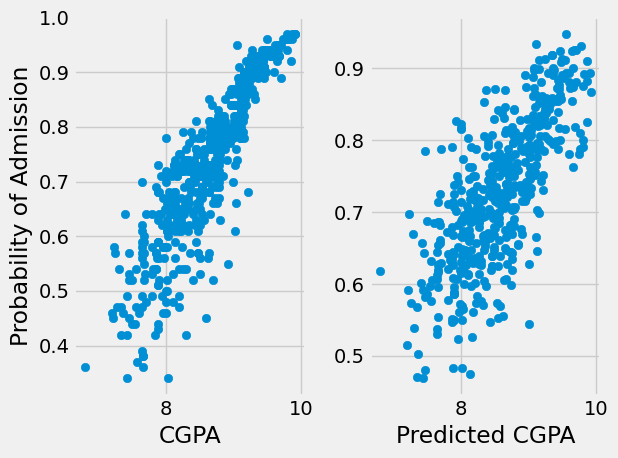

In [41]:
fig, ax = plt.subplots(1, 2)

ax[0].scatter(X_train[:, 5], y_train)
ax[1].scatter(X_train[:, 5], pred_y)

ax[0].set_xlabel("CGPA")
ax[1].set_xlabel("Predicted CGPA")
ax[0].set_ylabel("Probability of Admission")
plt.tight_layout()

The above results show that neve use a neural network for linear regression

## Let's Run the Linear Regression using the sklearn module

In [42]:
print(X_train.shape)
print(y_train.shape)

(500, 7)
(500,)


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [45]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [46]:
regr.score(X_train, y_train)

0.825590699287327

In [48]:
w = regr.coef_

In [49]:
b = regr.intercept_

In [50]:
pred_y = X_test @ w + b
e1= np.sum((y_test - pred_y) ** 2)
e2 = np.sum((y_test - np.mean(y_test)) ** 2)
r_squred = 1 - (e1 / e2)
r_squred

0.797091259637587

# From all above implementation we get to the conclusion
- Never use a Nural network if you want to implement a linear regression
- The best way of implementing a linear regression is using scikit (sklearn)
- You can also use the linear regression implementd by your own

## Let's Try out linear regression with the normalized features

The z-score Normalization is the most commanly used Noramlization
where $$\mathbf{X} = \frac{\mathbf{X} - \mu}{\sigma} $$  

where X = Features  
$\mu$ = Mean  
$\sigma$ = Standard deviation

In [51]:
def z_score_normalize(X):
    mu = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    X_norm = (X - mu) / std

    return X_norm, mu, std

In [52]:
X_norm, mu, std = z_score_normalize(X_train)

In [53]:
X_norm.shape

(400, 7)

## The difference between the Original model and the normalized model is shown below

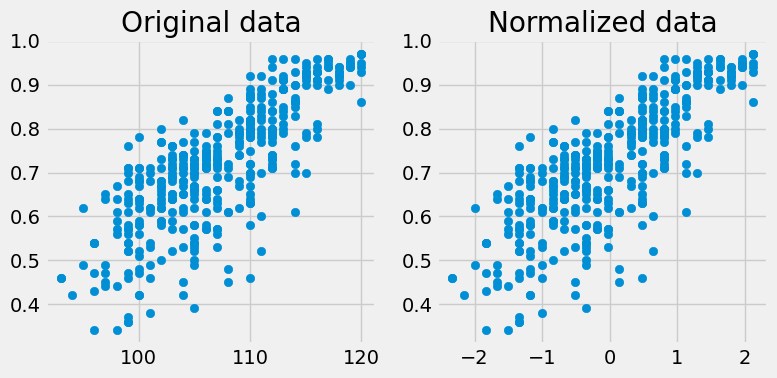

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_train[:, 1], y_train)
ax[0].set_title("Original data")

ax[1].scatter(X_norm[:, 1], y_train)
ax[1].set_title("Normalized data")

plt.tight_layout()

Notice the X-axis range

In [55]:
w = np.zeros(7)
b = 0
alpha = 1e-1
iter = 100000

w, b = compute_gradient_descent(X_norm, y_train, w, b, alpha, iter)

iter: 0, cost: 42925.84
iter: 10000, cost: 285.67462103068647
iter: 20000, cost: 285.67462103068647
iter: 30000, cost: 285.67462103068647
iter: 40000, cost: 285.67462103068647
iter: 50000, cost: 285.67462103068647
iter: 60000, cost: 285.67462103068647
iter: 70000, cost: 285.67462103068647
iter: 80000, cost: 285.67462103068647
iter: 90000, cost: 285.67462103068647


### Let's Calculate the value of R-Squred 

In [56]:
pred_y = X_norm @ w + b
e1= np.sum((y_train - pred_y) ** 2)
e2 = np.sum((y_train - np.mean(y_train)) ** 2)
r_squred = 1 - (e1 / e2)
r_squred

0.825590699287327

## From above implementation we can conclude that we can get the results same as scikit learn using the normalization with very few iterarion of Gradient Descent

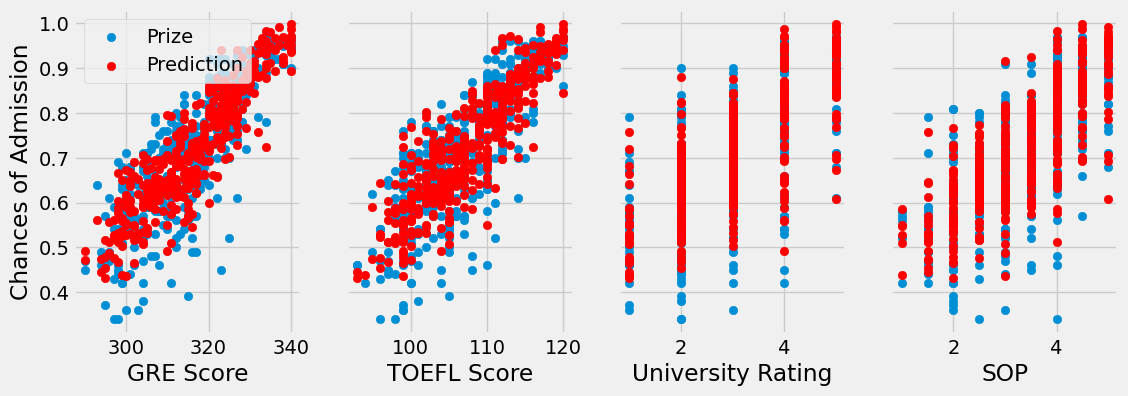

In [57]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:, i], y_train, label="Prize")
    ax[i].set_xlabel(col[i + 1])
    ax[i].scatter(X_train[:, i], pred_y, color="r", label="Prediction")
    
ax[0].legend(loc="upper left")
ax[0].set_ylabel("Chances of Admission")
plt.show()